<a href="https://colab.research.google.com/github/suriyakumar99/Pneumonia-Detection-transferLearning/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
from sklearn.metrics import f1_score 
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dropout, Conv2D

In [ ]:
import pandas as pd
import cv2
import numpy as np
import os, sys
from random import shuffle
from tqdm import tqdm
import scipy
import skimage
from skimage.transform import resize

In [ ]:
path = "F:\\ML\\chest_xray"
dir_list = os.listdir(path)
print("Files and directories in '", path, "' :") 
print(dir_list)

Files and directories in ' F:\ML\chest_xray ' :
['chest_xray', 'test', 'train', 'val', '__MACOSX']


In [ ]:
path = "F:\\ML\\chest_xray/train"
dir_list = os.listdir(path)
print("Files and directories in '", path, "' :") 
print(dir_list)

 


Files and directories in ' F:\ML\chest_xray/train ' :
['NORMAL', 'PNEUMONIA']


In [ ]:
path = "F:\\ML\\chest_xray/test"
dir_list = os.listdir(path)
print("Files and directories in '", path, "' :") 
print(dir_list)

Files and directories in ' F:\ML\chest_xray/test ' :
['NORMAL', 'PNEUMONIA']


In [ ]:
TRAIN_DIR = "F:\\ML\\chest_xray/train/"
TEST_DIR = "F:\\ML\\chest_xray/test/"

In [ ]:
def get_data(Dir):
  X=[]
  y=[]
  for nextDir in os.listdir(Dir):
    if not nextDir.startswith('.'):
      if nextDir in ['NORMAL']:
        label = 0
      elif nextDir in ['PNEUMONIA']:
        label = 1
      else:
        label = 2
      temp = Dir + nextDir
      for file in tqdm(os.listdir(temp)):
        img = cv2.imread(temp + '/' + file)
        if img is not None:
          img = skimage.transform.resize(img, (150, 150, 3))
          #img_file = scipy.misc.imresize(arr=img file, size=(150, 150, 3))
          img = np.asarray(img)
          X.append( img)
          y.append( label)
  X = np.asarray(X)
  y = np.asarray(y)
  return X,y

In [ ]:
X_train,y_train=get_data(TRAIN_DIR)

100%|██████████████████████████████████████████████████████████████████████████████| 3875/3875 [09:36<00:00,  6.72it/s]


In [ ]:
X_test,y_test=get_data(TEST_DIR)

100%|████████████████████████████████████████████████████████████████████████████████| 390/390 [00:50<00:00,  7.65it/s]


In [ ]:
print(X_train.shape,'\n', X_test.shape)

(5216, 150, 150, 3) 
 (624, 150, 150, 3)


In [ ]:
print(y_train.shape,'\n', y_test.shape)

(5216,) 
 (624,)


In [ ]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

In [ ]:
print(y_train.shape)
print(y_test.shape)

(5216, 2)
(624, 2)


In [ ]:
Pimages = os.listdir(TRAIN_DIR + "PNEUMONIA")
Nimages = os.listdir(TRAIN_DIR + "NORMAL")

In [ ]:
import matplotlib.pyplot as plt

def plotter(i):
  imagep1 = cv2.imread("{0}{1}{2}".format(TRAIN_DIR, "PNEUMONIA/", Pimages[i]))
  imagep1 = skimage.transform.resize(imagep1, (150, 150, 3) , mode = 'reflect')
  imagen1 = cv2.imread("{0}{1}{2}".format(TRAIN_DIR, "NORMAL/", Nimages[i]))
  imagen1 = skimage.transform.resize(imagen1, (150, 150, 3), mode = 'reflect')
  pair = np.concatenate((imagen1, imagep1), axis=1)
  print("(Left) - No Pneumonia Vs (Right) - Pneumonia")
  print("-------------------------------------------------------------------------")
  plt.figure(figsize=(5,5))
  plt.imshow(pair)
  plt.show()

(Left) - No Pneumonia Vs (Right) - Pneumonia
-------------------------------------------------------------------------


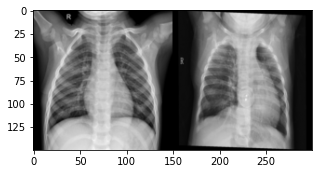

(Left) - No Pneumonia Vs (Right) - Pneumonia
-------------------------------------------------------------------------


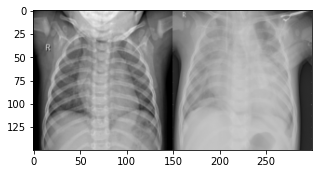

(Left) - No Pneumonia Vs (Right) - Pneumonia
-------------------------------------------------------------------------


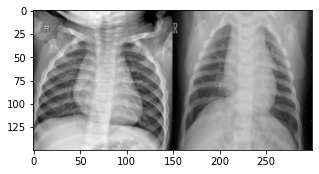

(Left) - No Pneumonia Vs (Right) - Pneumonia
-------------------------------------------------------------------------


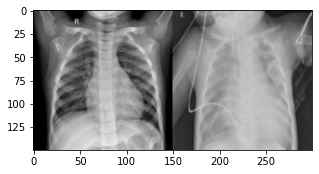

(Left) - No Pneumonia Vs (Right) - Pneumonia
-------------------------------------------------------------------------


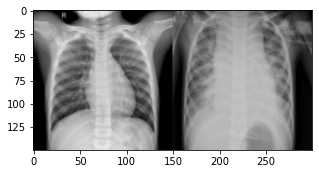

In [ ]:
for i in range(10,15):
  plotter(i)

In [ ]:
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint , LearningRateScheduler
Ip_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, min_delta=0.0001, patience=1, verbose=1)

In [ ]:
filepath="/content/chest_xray/chest_xray/transferlearning weights. hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
from keras.models import Sequential , Model
from keras.layers import Dense , Activation
from keras.layers import Dropout , GlobalAveragePooling2D
from keras. layers import Flatten
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import SGD
from keras.layers import Conv2D , BatchNormalization
from keras. layers import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.wrappers.scikit_learn import KerasClassifier

PRE PROCESSING

In [ ]:
#normalise
X_train=X_train.reshape(5216,150,150,3)
X_test=X_test.reshape(624,150,150,3)
X_train=X_train/255.0
X_test=X_test/255.0

CNN BASE MODEL

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(150,150,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))
# specifying parameters for fully connected layer
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(120,activation = 'softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      208       
_________________________________________________________________
activation (Activation)      (None, 150, 150, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0

In [ ]:
from keras.applications.inception_v3 import InceptionV3 
# create the base pre-trained model 
base_model=InceptionV3(weights=None, include_top=False , input_shape=(150, 150,3))

In [ ]:
x = base_model.output 
x = Dropout(0.5)(x) 
x = GlobalAveragePooling2D()(x) 
x = Flatten()(x) 
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x) 
predictions = Dense(2, activation='sigmoid')(x)

In [ ]:
base_model.save_weights("/content/chest_xray/chest_xray/inception_v3_weights. h5")

In [ ]:
base_model.load_weights("/content/chest_xray/chest_xray/inception_v3_weights. h5")

In [ ]:
model1 = Model(inputs=base_model.input, outputs=predictions)
model1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d_4[0][0]                   
__________________________________________________________________________________________________
activation_2 (Activation)       (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint , LearningRateScheduler
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
model1.compile(loss='categorical_crossentropy',
              optimizer="Adam",
              metrics=['accuracy'])
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, min_delta=0.0001, patience=1, verbose=1)
history=model1.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[learning_rate_reduction,checkpoint], epochs=5)

Epoch 1/10
163/163 [==============================] - 696s 4s/step - loss: 0.4688 - accuracy: 0.8202 - val_loss: 1.5232 - val_accuracy: 0.6250

Epoch 00001: val_accuracy improved from -inf to 0.62500, saving model to /content/chest_xray/chest_xray\transferlearning weights. hdf5
INFO:tensorflow:Assets written to: /content/chest_xray/chest_xray\transferlearning weights. hdf5\assets
Epoch 2/10
163/163 [==============================] - 685s 4s/step - loss: 0.1264 - accuracy: 0.9571 - val_loss: 2.6787 - val_accuracy: 0.6250

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00002: val_accuracy did not improve from 0.62500
Epoch 3/10
163/163 [==============================] - 650s 4s/step - loss: 0.0794 - accuracy: 0.9720 - val_loss: 2.3281 - val_accuracy: 0.6250

Epoch 00003: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00003: val_accuracy did not improve from 0.62500
Epoch 4/10
163/163 [==============================] - 6

In [ ]:
from keras.models import load_model
model1.save('my_model.h5')

In [ ]:
from sklearn.metrics import confusion_matrix
pred=model1.predict(X_test)
pred=np.argmax(pred, axis=1)
y_true= np.argmax(y_test, axis=1)

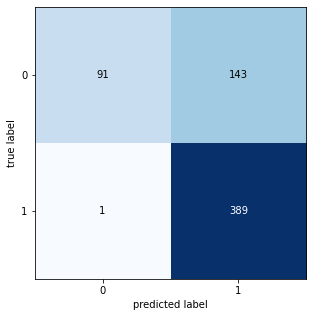

In [ ]:
#!pip install mlxtend
from mlxtend.plotting import plot_confusion_matrix
cm=confusion_matrix(y_true, pred)
fig, ax= plot_confusion_matrix(conf_mat=cm, figsize=(5,5))
plt.show()

In [ ]:
from sklearn import metrics
print(f"Classification report for classifier {model1}:\n"
    f"{metrics.classification_report(y_true, pred)}\n"
)

Classification report for classifier <keras.engine.functional.Functional object at 0x0000026386ABAF70>:
              precision    recall  f1-score   support

           0       0.99      0.39      0.56       234
           1       0.73      1.00      0.84       390

    accuracy                           0.77       624
   macro avg       0.86      0.69      0.70       624
weighted avg       0.83      0.77      0.74       624


